In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
path= 'C:/Users/Usuário/Desktop/Bootcamp IA/datas/'


In [3]:
df =path +'bootcamp_train.csv'

In [4]:
df_train = pd.read_csv(df, encoding='utf-8', sep =',')


In [5]:
df_train.head(20)

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não
5,5,-11,-186.0,590440,590503,100,-206,198,119,637317.0,...,-0.1895,1.0000,45,False,False,True,False,não,False,Não
6,6,39,217.0,1359602,1359742,100,10276,552,319,1187807.0,...,-0.0970,1.0000,25,0,False,True,False,não,False,Não
7,7,43,200.0,696884,696948,100,-206,206,129,626256.0,...,-0.1925,1.0000,45,False,False,True,False,não,False,Não
8,8,772,777.0,1436089,1436092,100,11,-229,3,1398.0,...,-0.0071,0.1284,111,False,False,False,True,Não,False,Não
9,9,41,-186.0,1505915,1505982,100,6494,315,145,671353.0,...,-0.1923,1.0000,38,False,False,True,False,não,False,Não


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

In [7]:
df_train.shape

(3390, 39)

In [10]:
df_train.isnull().sum()

id                                0
x_minimo                          0
x_maximo                         56
y_minimo                          0
y_maximo                          0
peso_da_placa                     0
area_pixels                       0
perimetro_x                       0
perimetro_y                       0
soma_da_luminosidade            100
maximo_da_luminosidade           98
comprimento_do_transportador      0
tipo_do_aço_A300                  0
tipo_do_aço_A400                 76
espessura_da_chapa_de_aço        41
temperatura                       0
index_de_bordas                   0
index_vazio                       0
index_quadrado                   36
index_externo_x                   0
indice_de_bordas_x                0
indice_de_bordas_y                0
indice_de_variacao_x              0
indice_de_variacao_y              0
indice_global_externo            59
log_das_areas                     0
log_indice_x                      0
log_indice_y                

## Tratamento das colunas com valores despadronizados

In [12]:
print(df_train['tipo_do_aço_A300'].unique())
print(df_train['tipo_do_aço_A400'].unique())

['Não' 'não' '1' 'Sim' 'sim' '0' 'N' '-']
['sim' 'Sim' 'Não' 'não' nan '1' '0' 'S' 'nao']


In [13]:
cols_falhas = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

In [14]:
for col in cols_falhas:
    print(f'Dados únicos na coluna {col}:', df_train[col].unique())

Dados únicos na coluna falha_1: ['False' '0' '1' 'True' 'nao' 'S']
Dados únicos na coluna falha_2: ['0' 'False' 'True' 'y' '1' 'S']
Dados únicos na coluna falha_3: [False  True]
Dados únicos na coluna falha_4: ['False' 'True' 'nao' '0' 'S' '1']
Dados únicos na coluna falha_5: ['não' 'Não' 'Sim' 'sim']
Dados únicos na coluna falha_6: [False  True]
Dados únicos na coluna falha_outros: ['Sim' 'Não']


In [15]:
from src.preProcessamento import corrigir_tipos_nulos_aco, corrigir_tipos, corrigir_falhas, preencher_com_mediana


In [16]:
df_train[['tipo_do_aço_A300', 'tipo_do_aço_A400']] = df_train.apply(corrigir_tipos_nulos_aco, axis=1)
df_train[['tipo_do_aço_A300', 'tipo_do_aço_A400']] = df_train.apply(corrigir_tipos, axis=1)
df_train = corrigir_falhas(df_train)
df_train = preencher_com_mediana(df_train)



C:\Users\Usuário\Desktop\Bootcamp IA\src\preProcessamento.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_falhas] = df[cols_falhas].replace(


In [17]:
for col in cols_falhas:
    print(f'Dados únicos na coluna após mudança {col}:', df_train[col].unique())
    print(df_train[col].dtypes)

Dados únicos na coluna após mudança falha_1: [0 1]
int64
Dados únicos na coluna após mudança falha_2: [0 1]
int64
Dados únicos na coluna após mudança falha_3: [0 1]
int64
Dados únicos na coluna após mudança falha_4: [0 1]
int64
Dados únicos na coluna após mudança falha_5: [0 1]
int64
Dados únicos na coluna após mudança falha_6: [0 1]
int64
Dados únicos na coluna após mudança falha_outros: [1 0]
int64


In [18]:
print('Dados unicos a300',df_train['tipo_do_aço_A300'].unique())
print('Dados unicos a400',df_train['tipo_do_aço_A400'].unique())

print('Dados Nulos nas colunas tipos aço')
df_train['tipo_do_aço_A400'].isnull().sum()
df_train['tipo_do_aço_A400'].isnull().sum()

Dados unicos a300 [0 1]
Dados unicos a400 [1 0]
Dados Nulos nas colunas tipos aço


0

In [19]:
df_numericas = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=["id"], errors="ignore")


In [34]:
df_numericas.describe()

,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
count,3390.000000,3390.000000,3.390000e+03,3.390000e+03,3390.0,3390.000000,3390.000000,3390.000000,3.390000e+03,3390.000000,...,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,995.507375,604.877581,2.692640e+06,1.592301e+06,100.0,1566.317699,66.733923,47.261062,1.879376e+05,129.124189,...,-0.135043,0.570363,171.763422,0.081121,0.077876,0.191445,0.034218,0.028319,0.237758,0.349263
std,1796.737709,543.587428,5.625693e+06,1.821345e+06,0.0,4337.683975,195.092105,336.794632,4.492137e+05,15.880108,...,0.132191,0.335394,272.952080,0.273061,0.268016,0.393497,0.181816,0.165906,0.425773,0.476807
min,-11.000000,-186.000000,-2.000000e+01,-1.660000e+02,100.0,-206.000000,-229.000000,-194.000000,2.550000e+02,37.000000,...,-0.860300,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,181.250000,3.934352e+05,3.407380e+05,100.0,68.000000,12.000000,11.000000,9.714000e+03,124.000000,...,-0.193300,0.248200,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,614.000000,544.000000,1.265462e+06,1.128297e+06,100.0,142.000000,22.000000,21.000000,1.783600e+04,127.000000,...,-0.140800,0.472100,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1187.500000,1088.000000,2.555025e+06,2.184335e+06,100.0,524.750000,58.000000,56.000000,6.292600e+04,135.000000,...,-0.079700,0.999300,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,15266.000000,1713.000000,1.041366e+08,1.291709e+07,100.0,152655.000000,1275.000000,18152.000000,1.159141e+07,253.000000,...,0.591700,1.000000,2086.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
z_scores = np.abs(zscore(df_numericas))
outliers_zscore = (z_scores > 3)
df_outliers_z = df_train[outliers_zscore.any(axis=1)]
print("Z-score detectou:", df_outliers_z.shape[0], "outliers")


Z-score detectou: 1269 outliers


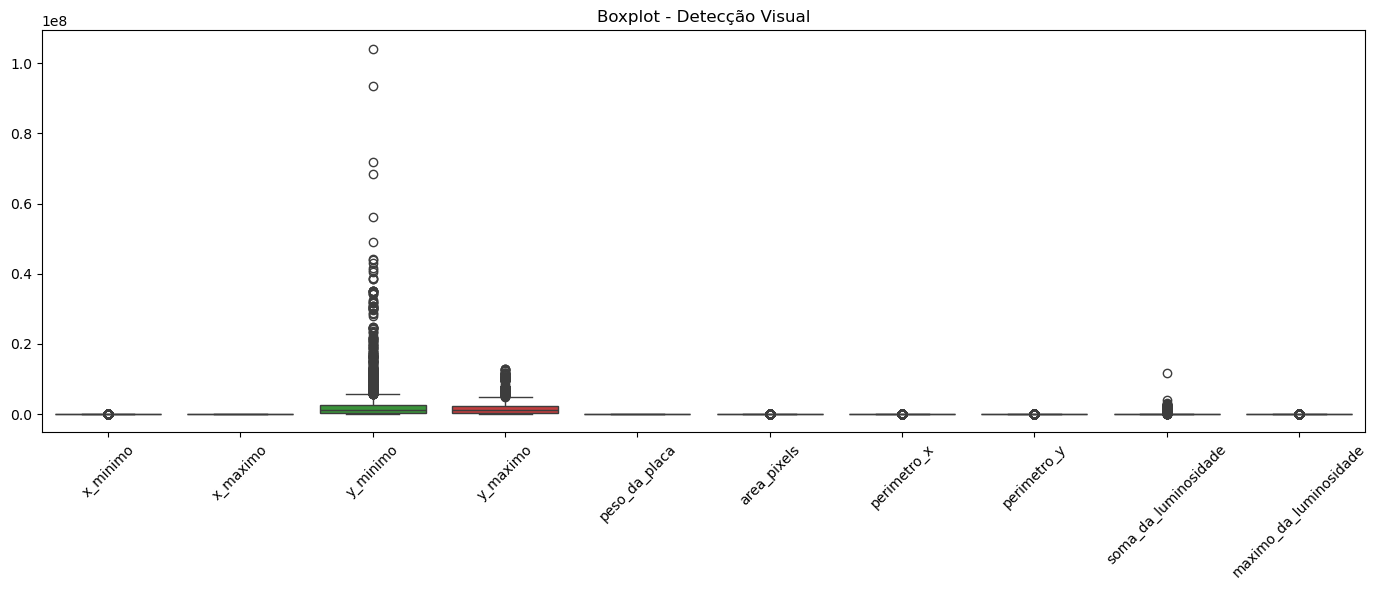

In [42]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_numericas.iloc[:, :10])
plt.title("Boxplot - Detecção Visual")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


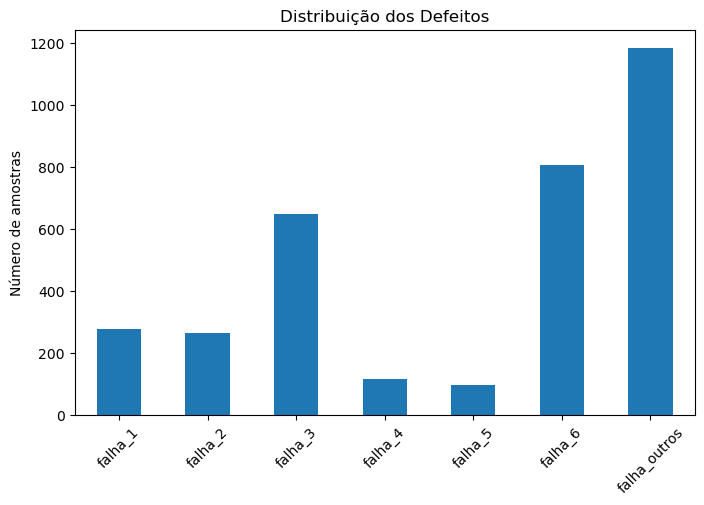

In [46]:
df_train[cols_falhas] = df_train[cols_falhas].apply(pd.to_numeric, errors='coerce')
df_train[cols_falhas].sum().plot(kind='bar', title='Distribuição dos Defeitos', figsize=(8,5))
plt.ylabel("Número de amostras")
plt.xticks(rotation=45)
plt.show()


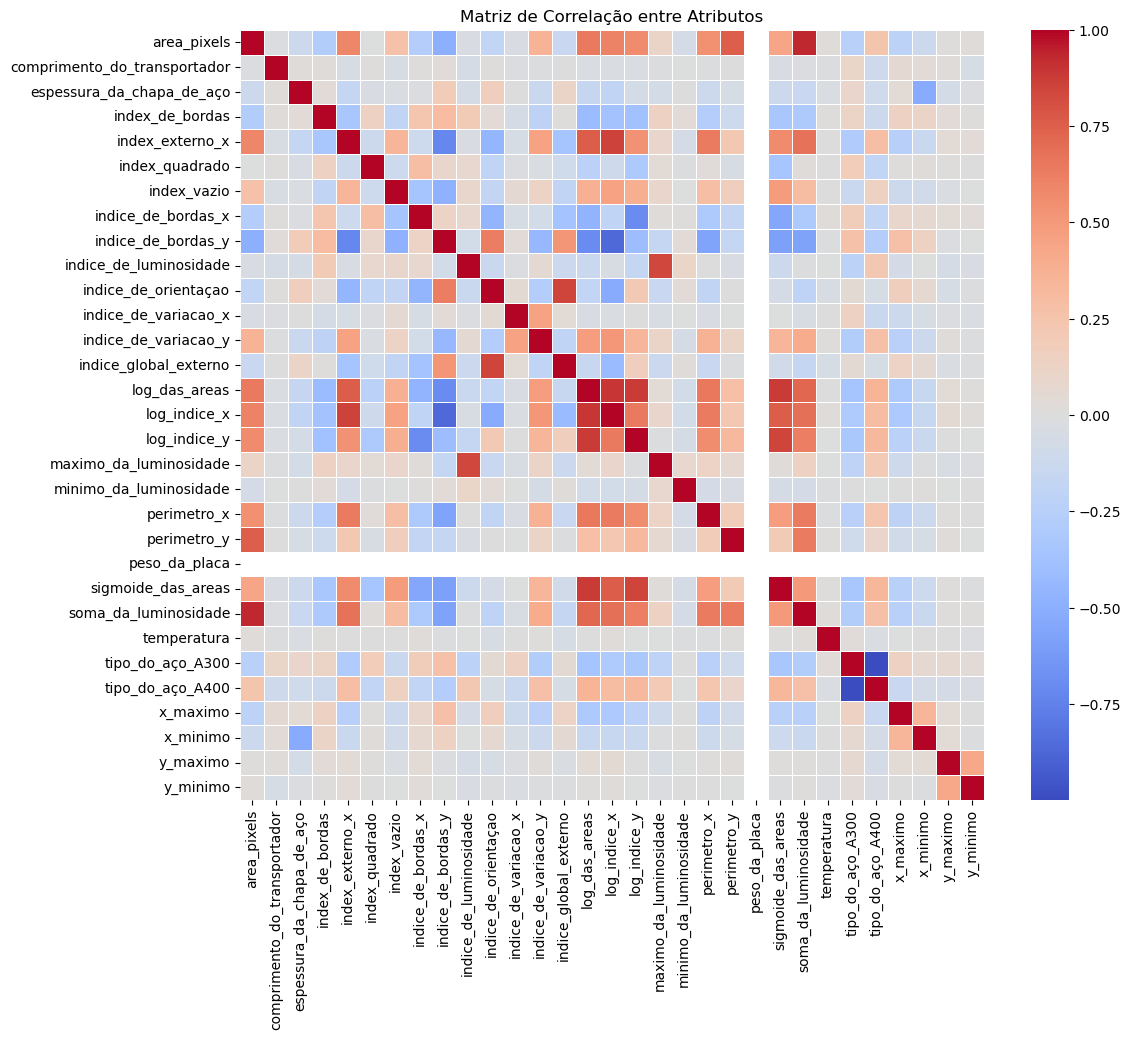

In [48]:
feature_cols = df_train.columns.difference(['id'] + cols_falhas)
corr = df_train[feature_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5, annot=False)
plt.title("Matriz de Correlação entre Atributos")
plt.show()


In [50]:

df_a300 = df_train[df_train['tipo_do_aço_A300'] == 1]
df_a400 = df_train[df_train['tipo_do_aço_A400'] == 1]

falhas_a300 = df_a300[cols_falhas].sum()
falhas_a400 = df_a400[cols_falhas].sum()


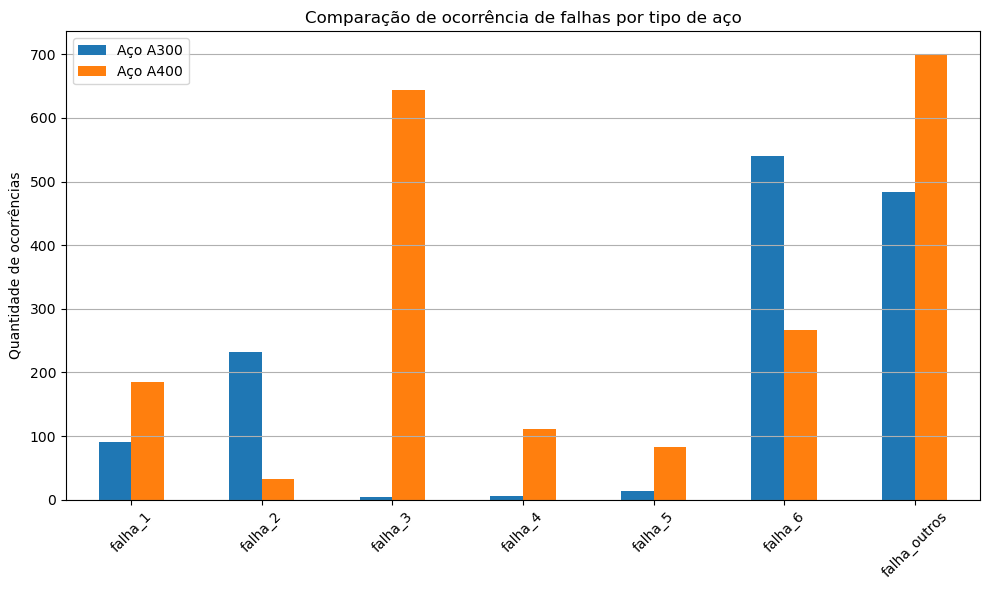

In [52]:

df_plot = pd.DataFrame({
    'Aço A300': falhas_a300,
    'Aço A400': falhas_a400
})

df_plot.plot(kind='bar', figsize=(10,6))
plt.title("Comparação de ocorrência de falhas por tipo de aço")
plt.ylabel("Quantidade de ocorrências")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [56]:
df_train.isnull().sum()

id                              0
x_minimo                        0
x_maximo                        0
y_minimo                        0
y_maximo                        0
peso_da_placa                   0
area_pixels                     0
perimetro_x                     0
perimetro_y                     0
soma_da_luminosidade            0
maximo_da_luminosidade          0
comprimento_do_transportador    0
tipo_do_aço_A300                0
tipo_do_aço_A400                0
espessura_da_chapa_de_aço       0
temperatura                     0
index_de_bordas                 0
index_vazio                     0
index_quadrado                  0
index_externo_x                 0
indice_de_bordas_x              0
indice_de_bordas_y              0
indice_de_variacao_x            0
indice_de_variacao_y            0
indice_global_externo           0
log_das_areas                   0
log_indice_x                    0
log_indice_y                    0
indice_de_orientaçao            0
indice_de_lumi

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3390 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3390 non-null   float64
 10  maximo_da_luminosidade        3390 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   int64  
 13  tip

In [60]:
# Somando dados negativos por coluna que tenha 1 ou mais
neg2 = (df_train.select_dtypes(include=[np.number]) < 0).sum()
neg2 = neg2[neg2 > 0]
print(neg2)

x_minimo                         339
x_maximo                         333
y_minimo                         339
y_maximo                         339
area_pixels                      339
perimetro_x                      339
perimetro_y                      339
comprimento_do_transportador     339
espessura_da_chapa_de_aço        338
indice_de_variacao_x            1508
indice_de_variacao_y            1293
indice_de_orientaçao            1321
indice_de_luminosidade          3072
dtype: int64


## Treinamento do modelo e predições

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split




In [119]:
def separar_features_labels(df):
    label_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
    feature_cols = df.columns.difference(['id'] + label_cols)
    return df[feature_cols], df[label_cols]

In [130]:
def scales(X):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(X)
    return pd.DataFrame(scaled, columns=X.columns)

In [137]:
def treinar_avaliar_modelos(modelo, nome_modelo, X, y, test_size=0.2,random_state =0):    

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
     
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_val)
    acc = accuracy_score(y_val, y_pred)

    print(f"\n=== {nome_modelo} ===")
    print(f"Acurácia: {acc:.4f}")
    print(f"Relatório de Classificação")
    print(classification_report(y_val, y_pred, zero_division=0))
    print("Matrizes de Confusão por classe:")
    mcm = multilabel_confusion_matrix(y_val, y_pred)
    for i, col in enumerate(y_val.columns):
        print(f"\nClasse: {col}")
        print(mcm[i])
        
        disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
        disp.plot(cmap='Blues')
        plt.title(f"Matriz de Confusão - {col}")
        plt.tight_layout()
        plt.show()

    
    return modelo, acc

# Randon Forest


=== Random Forest ===
Acurácia: 0.5059
Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        53
           1       0.93      0.72      0.81        53
           2       0.96      0.94      0.95       124
           3       0.74      0.74      0.74        23
           4       0.75      0.26      0.39        23
           5       0.62      0.35      0.45       171
           6       0.68      0.48      0.56       231

   micro avg       0.77      0.51      0.62       678
   macro avg       0.81      0.50      0.56       678
weighted avg       0.77      0.51      0.58       678
 samples avg       0.51      0.51      0.51       678

Matrizes de Confusão por classe:

Classe: falha_1
[[625   0]
 [ 52   1]]


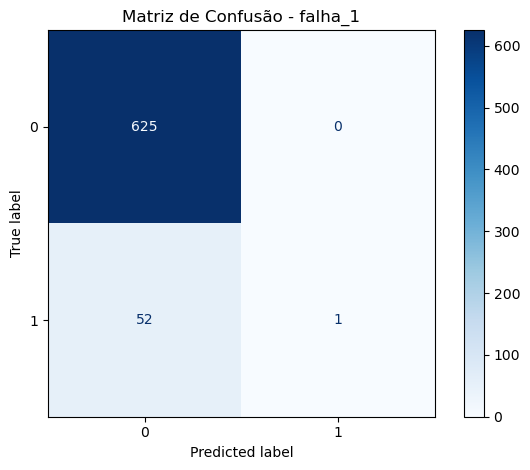


Classe: falha_2
[[622   3]
 [ 15  38]]


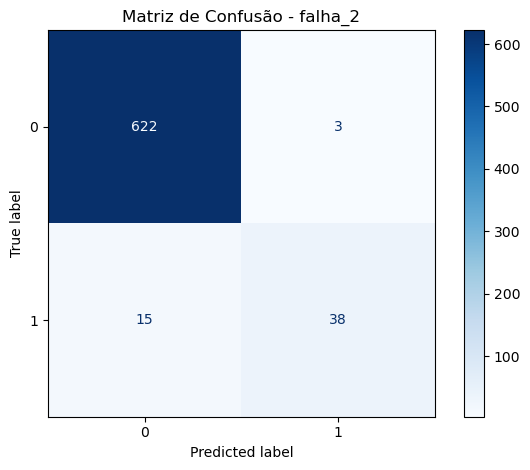


Classe: falha_3
[[549   5]
 [  8 116]]


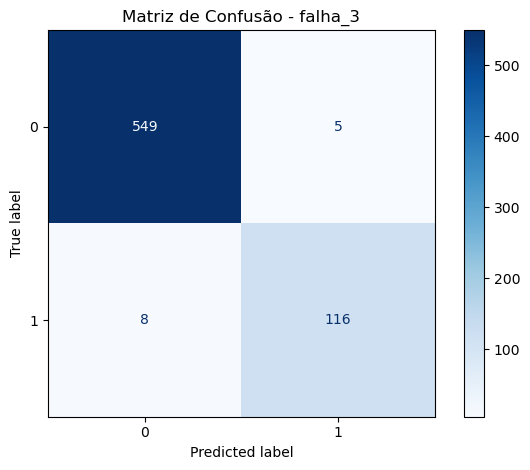


Classe: falha_4
[[649   6]
 [  6  17]]


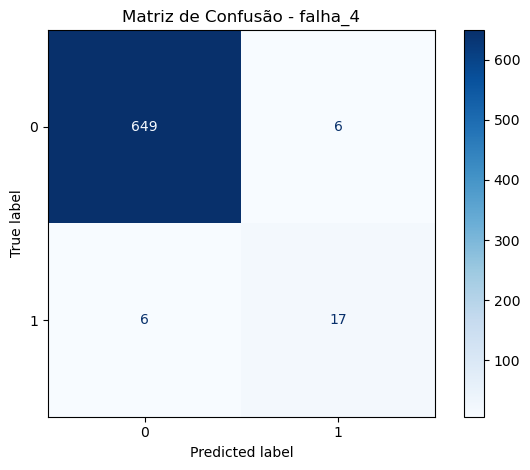


Classe: falha_5
[[653   2]
 [ 17   6]]


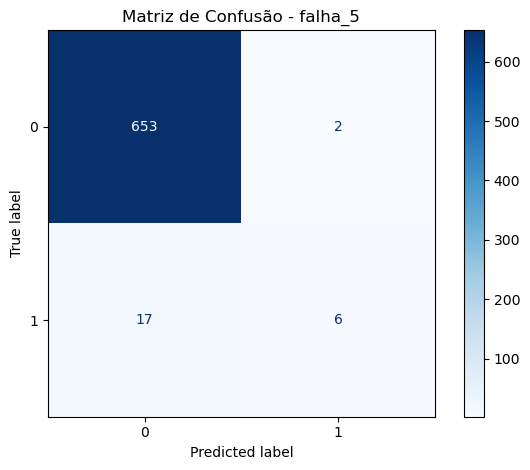


Classe: falha_6
[[471  36]
 [111  60]]


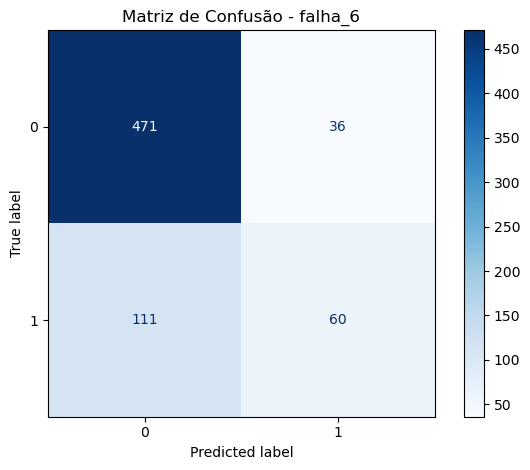


Classe: falha_outros
[[396  51]
 [121 110]]


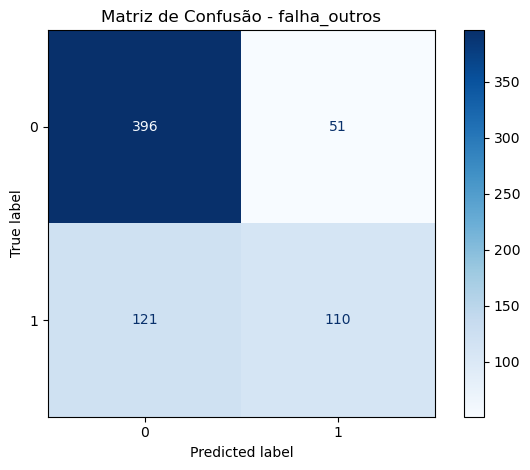

In [139]:

X, y = separar_features_labels(df_train)
X_scaled = scales(X)
modelo = MultiOutputClassifier(RandomForestClassifier(n_estimators= 200,criterion='entropy', random_state=1))

modelo_treinado,acuracia = treinar_avaliar_modelos(modelo,"Random Forest", X_scaled, y)

10 Features mais importantes:
                         Feature  Importância
11          indice_de_variacao_x     0.083173
14                 log_das_areas     0.070275
23          soma_da_luminosidade     0.051560
4                index_externo_x     0.044141
22            sigmoide_das_areas     0.041830
12          indice_de_variacao_y     0.041150
15                  log_indice_x     0.040457
1   comprimento_do_transportador     0.038493
3                index_de_bordas     0.037420
16                  log_indice_y     0.035570


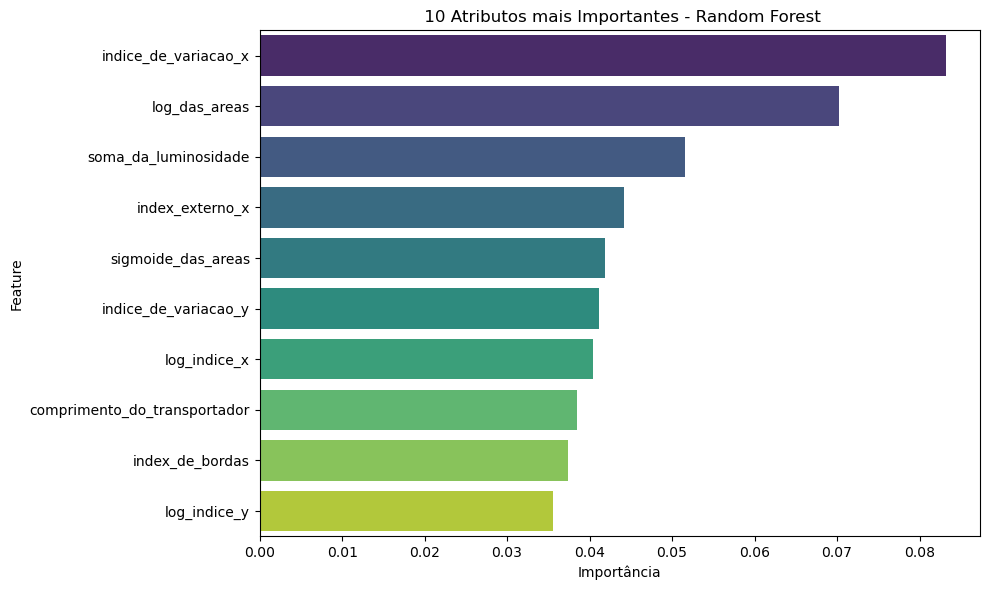

In [175]:
importances = []
for estimador in modelo.estimators_:
    importances.append(estimador.feature_importances_)
media_importances = np.mean(importances, axis=0)

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importância': media_importances
}).sort_values(by='Importância', ascending= False)


print("10 Features mais importantes:")
print(feat_imp.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', data=feat_imp.head(10),hue='Feature', palette='viridis')
plt.title(" 10 Atributos mais Importantes - Random Forest")
plt.tight_layout()
plt.show()

In [143]:
def treinar_avaliar_modelos_proba(modelo, nome_modelo, X, y, test_size=0.2,random_state =0):    

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
    modelo.fit(X_train, y_train)
    y_pred_prob = modelo.predict_proba(X_val)
    y_pred_proba_arr = np.column_stack([prob[:,1] for prob in y_pred_prob])

    y_pred = (y_pred_proba_arr >= 0.5).astype(int)    
    acc = accuracy_score(y_val, y_pred)

    print(f"\n=== {nome_modelo} ===")
    print(f"Acurácia: {acc:.4f}")
    print(f"Relatório de Classificação")
    print(classification_report(y_val, y_pred, zero_division=0))
    print("Matrizes de Confusão por classe:")
    mcm = multilabel_confusion_matrix(y_val, y_pred)

    for i, col in enumerate(y_val.columns):
        print(f"\nClasse: {col}")
        print(mcm[i])

    return modelo, acc

In [157]:
X, y = separar_features_labels(df_train)
modelo = MultiOutputClassifier(RandomForestClassifier(n_estimators=300, random_state=42))
X_scaled = scales(X)
modelo_treinado_proba,acuracia = treinar_avaliar_modelos_proba(modelo,"Random Forest", X_scaled, y)


=== Random Forest ===
Acurácia: 0.5103
Relatório de Classificação
              precision    recall  f1-score   support

           0       0.80      0.08      0.14        53
           1       0.93      0.72      0.81        53
           2       0.96      0.94      0.95       124
           3       0.77      0.74      0.76        23
           4       0.75      0.26      0.39        23
           5       0.62      0.33      0.43       171
           6       0.67      0.48      0.56       231

   micro avg       0.77      0.52      0.62       678
   macro avg       0.78      0.51      0.58       678
weighted avg       0.75      0.52      0.59       678
 samples avg       0.51      0.52      0.52       678

Matrizes de Confusão por classe:

Classe: falha_1
[[624   1]
 [ 49   4]]

Classe: falha_2
[[622   3]
 [ 15  38]]

Classe: falha_3
[[549   5]
 [  7 117]]

Classe: falha_4
[[650   5]
 [  6  17]]

Classe: falha_5
[[653   2]
 [ 17   6]]

Classe: falha_6
[[472  35]
 [114  57]]

Classe: 

In [158]:
def predicao(model, X_test: pd.DataFrame, ids: pd.Series, output_path: str = 'predicoes.csv'):
    y_pred = model.predict(X_test)
    y_pred = np.array(y_pred)
    
    pred_df = pd.DataFrame(y_pred, columns=[
        'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'
    ])
    pred_df.insert(0, 'id', ids.values)
    pred_df.to_csv(output_path, index=False)
    print(f"Predições salvas em {output_path}")


In [159]:
df2 =path +'bootcamp_test.csv'
df_test = pd.read_csv(df2, encoding='utf-8', sep =',')

In [169]:

X_test = df_test[X.columns]
predicao(modelo_treinado, X_test, df_test['id'])

Predições salvas em predicoes.csv


In [171]:
import numpy as np

def predicao_probabilidades(model, X_test: pd.DataFrame, ids: pd.Series, output_path: str = 'predicoes_prob.csv'):
    y_pred_prob = model.predict_proba(X_test)
    
    # Extrai a probabilidade da classe positiva para cada label e junta colunas
    y_pred_proba_arr = np.vstack([prob[:,1] for prob in y_pred_prob]).T

    pred_df = pd.DataFrame(y_pred_proba_arr, columns=[
        'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'
    ])
    pred_df.insert(0, 'id', ids.values)
    pred_df.to_csv(output_path, index=False)
    print(f"Predições (probabilidades) salvas em {output_path}")


In [173]:

X_test = df_test[X.columns]
predicao_probabilidades(modelo_treinado_proba, X_test, df_test['id'])

Predições (probabilidades) salvas em predicoes_prob.csv
